 # Megaline 'Surf' and 'Ultimate Plans - Preliminary Analysis
 
 - Preliminary analysis of the plans based on a relatively small client selection (500 users).
 - Analyze clients behavior and determine which prepaid plan is more profitable.

## Table of Contents

**[Step 1. Open the data file and study the general information](#1)**

 [Open the data](#1.1)
 
 [First look at the data](#1.2)
 
 
  
 **[Step 2. Data Preprocessing](#2)**
 
 [calls data](#2.1)
 
 [internet data](#2.2)
 
 [messages data](#2.3)
 
 [Merge the data](#2.4)
 
 [Check for duplicates](#2.41)
 
 [Clean outliars](#2.5)
 
 
 **[Step 3. Analyze the data](#3)**
 
 [Approach](#3.1)
 
 [Row function fo calculate profit](#3.2)
 
 [Edit the table for profit analysis](#3.3)
 
 [Add city to each user_id](#3.4)
 
 [Functions for plotting histograms and calculate statistics](#3.5)
 
 [Analysis: How many users from each plan exceed plan's limit](#3.6)
 
 [Analysis:  Profit veriations by month](#3.7)
 
 [Surf plan analysis](#3.8)
 
 [Ultimate plan analysis](#3.9)
 
  
 **[Step 4. Test hypothesis](#4)**
 
 [The Shapiro-Wilk Test for Normality](#4.01)
 
 [Test 1: The average profit from users of Ultimate and Surf calling plans differs](#4.1)
 
 [Test 2: The average profit from users in NY-NJ area is different from that of the users from other regions.](#4.2)
 
 
 **[Step 5. Overall Conclusion](#5)**
 

<a class="anchor" id="1"></a>

## Step 1. Open the data file and study the general information

<a class="anchor" id="1.1"></a>
### Open the data

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from functools import reduce
from scipy import stats as st

#calls = pd.read_csv('/datasets/megaline_calls.csv')
#internet = pd.read_csv('/datasets/megaline_internet.csv')
#messages = pd.read_csv('/datasets/megaline_messages.csv')
#plans = pd.read_csv('/datasets/megaline_plans.csv')
#users = pd.read_csv('/datasets/megaline_users.csv')



# import files
calls = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
messages = pd.read_csv('megaline_messages.csv')
plans = pd.read_csv('megaline_plans.csv')
users = pd.read_csv('megaline_users.csv')

<a class="anchor" id="1.2"></a>
### First look at the data

In [29]:

# Calls data
#display(calls.head(5))
#display(calls.describe())
#display(calls.info())
#display(len(calls.query('duration == 0'))/len(calls))
#calls.duration.describe()
#calls.hist('duration', bins = 20)

# Internet data
display(internet.head(5))
#display(internet.describe())
#display(internet.info())
#display(internet.hist('mb_used',  bins = 20))
#display(len(internet.query('mb_used < 100'))/len(internet))

# Messages data
#display(messages.head(5))
#display(messages.describe())
#display(messages.info())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Observations

##### calls:
- Over 137K rows. each row represents a call for each user id. 
- The histogram shows that most of the data records are with 0 min call durations, will be removed to create the correct distribution. 
- 0 min calls reprssents 20% of the data. Decided to keep the data after running the script with and without these values. 
- Mean of 6.74 min and std of 5.83 suggests high dispersion. 


##### internet:
- The histogram shows that most of the datasts contain values low then 100mb, lower then the q1 values.
- Again, we have an odd skewed histogram, which was fixed after the preprocessing stage. 


##### messages
- In order to gain valuable insights, we need to preprocess this data first.


<a class="anchor" id="2"></a>
## Step 2: Data Preprocessing 

<a class="anchor" id="2.1"></a>
### calls data
- Create pivot table by user_id and month. 
- Round up data to minutes.
- Plot histogram.

,user_id,month,duration
0,1000,12,108.0
1,1001,8,160.0
2,1001,9,278.0
3,1001,10,348.0
4,1001,11,379.0
5,1001,12,368.0
6,1002,10,51.0
7,1002,11,338.0
8,1002,12,346.0
9,1003,12,987.0


array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

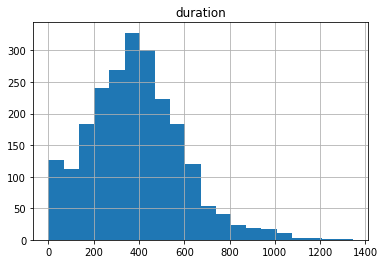

In [30]:
# turn duration to int
calls.duration = calls.duration.astype('int')

# round up calls duration
calls.duration = np.ceil(calls.duration)

# Remove 0 velues 
#calls_zero_index = calls[calls['duration'] == 0].index
#calls.drop(calls_zero_index, inplace = True)

# add column of call month
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month'] = calls['call_date'].dt.month

# make pivot table by user id and month
calls_pivot = calls.pivot_table(index = ['user_id','month'], values='duration', aggfunc = 'sum').reset_index()
display(calls_pivot.head(10))

#display the pivot_table after cleaning
display(calls_pivot.hist('duration', bins = 20))



##### Calls data observaions: after preprocessing, the histograms seems to show a normal distrubution 


<a class="anchor" id="2.2"></a>
### Internet data
- Create pivot table by user_id and month. 
- Rounde up data to mb in thousends.
- Plot histogram.

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0
5,1001,12,19369.18,19.0
6,1002,10,6552.01,7.0
7,1002,11,19345.08,19.0
8,1002,12,14396.24,15.0
9,1003,12,27044.14,27.0


array([[<AxesSubplot:title={'center':'gb_used'}>]], dtype=object)

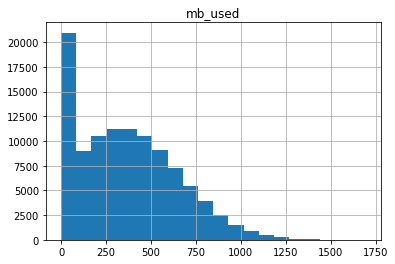

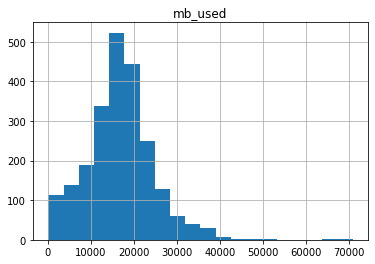

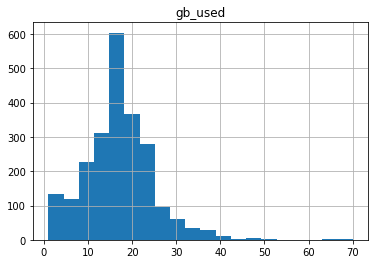

In [31]:
# add column of usage by month
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = internet['session_date'].dt.month


internet.hist('mb_used', bins = 20)

# make a pivot table by user_id and month
internet_pivot = internet.pivot_table(index = ['user_id','month'], values='mb_used', aggfunc = 'sum').reset_index()

internet_pivot.hist('mb_used', bins = 20)


### After review: Cancel this function
# function to round up to mb in thousends
#def roundup(x):
#     return int(math.ceil(x / 1024.0)) * 1000
# run the function 
#internet_pivot['mb_used'] = internet_pivot.mb_used.apply(lambda x: roundup(x))


### After review: added a new column for gb_used, rounded up. 
internet_pivot['gb_used'] = internet_pivot['mb_used'] / 1024
internet_pivot['gb_used'] = np.ceil(internet_pivot['gb_used'])

# display pivot table and histogram
display(internet_pivot.head(10))
internet_pivot.hist('gb_used', bins = 20)


#### internet data observaions: after preprocessing, the mean seems to be more centered, data is less skewed. 

<a class="anchor" id="2.3"></a>
### Message data
- Create pivot table by user_id and month. 
- the message_date will show the sum of total messages for each month.
- Plot histogram.

,user_id,month,message_date
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


array([[<AxesSubplot:title={'center':'message_date'}>]], dtype=object)

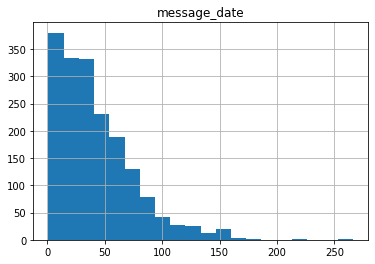

In [32]:
# add column of messages count by month
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month

# create a pivot table by user_id and month
messages_pivot = messages.pivot_table(index = ['user_id','month'], values='message_date', aggfunc = 'count').reset_index()

# display pivot table and histograms
display(messages_pivot.head(10))
messages_pivot.hist('message_date', bins = 20)



#### internet data observaions: after preprocessing, histogram shows skewed data.

<a class="anchor" id="2.4"></a>
### Merge the data 

In [33]:
# Merge all data according to user_id 

# merge calls, internet and massages pivot plots
data_frames = [calls_pivot, internet_pivot, messages_pivot]
df_merged = reduce(lambda left,right: pd.merge(left,right, on = ['user_id', 'month']), data_frames)

# merge plan package
df_merged['plan'] = df_merged.user_id.map(users.set_index('user_id').plan)

display(df_merged.head(10))

,user_id,month,duration,mb_used,gb_used,message_date,plan
0,1000,12,108.0,1901.47,2.0,11,ultimate
1,1001,8,160.0,6919.15,7.0,30,surf
2,1001,9,278.0,13314.82,14.0,44,surf
3,1001,10,348.0,22330.49,22.0,53,surf
4,1001,11,379.0,18504.30,19.0,36,surf
5,1001,12,368.0,19369.18,19.0,44,surf
6,1002,10,51.0,6552.01,7.0,15,surf
7,1002,11,338.0,19345.08,19.0,32,surf
8,1002,12,346.0,14396.24,15.0,41,surf
9,1003,12,987.0,27044.14,27.0,50,surf


<div class="alert alert-block alert-success">
<b>Well done!👍:</b> You have offered an interesting way to merge the dataframe. It is good that you use the methods of the functional programming in Python: map() and reduce() methods.
</div> 

<a class="anchor" id="2.41"></a>
### Check for duplicates

In [34]:
### check for duplicates

# a list of column names in order to drop duplicates.
columns_names = ['duration', 'mb_used', 'message_date']

print("The number of duplicates is", df_merged.duplicated(subset = columns_names).sum())

The number of duplicates is 0


In [35]:
# check table after corrections
display(df_merged.head(10))

,user_id,month,duration,mb_used,gb_used,message_date,plan
0,1000,12,108.0,1901.47,2.0,11,ultimate
1,1001,8,160.0,6919.15,7.0,30,surf
2,1001,9,278.0,13314.82,14.0,44,surf
3,1001,10,348.0,22330.49,22.0,53,surf
4,1001,11,379.0,18504.30,19.0,36,surf
5,1001,12,368.0,19369.18,19.0,44,surf
6,1002,10,51.0,6552.01,7.0,15,surf
7,1002,11,338.0,19345.08,19.0,32,surf
8,1002,12,346.0,14396.24,15.0,41,surf
9,1003,12,987.0,27044.14,27.0,50,surf


<a class="anchor" id="2.5"></a>
### Clean outliars

##### Use boxplots and IQR method to clean outliars

In [36]:
#Boxplots:

# Display boxplots to look for outliars for each column 
#df_merged.boxplot(column=['duration'])
#plt.show()
#df_merged.boxplot(column=['mb_used'])
#plt.show()
#df_merged.boxplot(column=['message_date'])

In [37]:
#IQR method:

# columns to check
#parameters = ['duration', 'mb_used', 'message_date']

# loop for outliars table
#limits = []
#for x in parameters:
#    Q1 = df_merged[x].quantile(0.25)
#    Q3 = df_merged[x].quantile(0.75)
#    IQR = Q3 - Q1
#    upper_fence = Q3 + 1.5*IQR
#    lower_fence = Q1
#    limits.append([x, upper_fence, lower_fence])

#limits = pd.DataFrame(limits, columns = ['parameter', 'upper_fence', 'lower_fence'])
#display(limits)

# check the precentage of outliars
#print('Percetange of outliars for duration, mb_used and messages (respectively) before drop():')
#display(len(calls_pivot[calls_pivot['duration'] > 909 ]) / len(calls_pivot))
#display(len(internet_pivot[internet_pivot['mb_used'] > 35500.0 ]) / len(internet_pivot))
#display(len(messages_pivot[messages_pivot['message_date'] > 122.0]) / len(messages_pivot))

# drop outliars
#calls_pivot = calls_pivot.drop(index = calls_pivot[calls_pivot['duration'] > 909].index)
#internet_pivot = internet_pivot.drop(index = internet_pivot[internet_pivot['mb_used'] > 35500.0].index)
#messages_pivot = messages_pivot.drop(index = messages_pivot[messages_pivot['message_date'] > 122.0].index)

we see that the number of outliars is small, less then 3.5% for each column of the data

<div class="alert alert-block alert-warning">
<b>Remarks and tips📌:</b>  Nadav, it is better not to delete the 'outliers' as you call them from the data, because these values are not outliers but simply rare values, that you need to conduct the analysis correctly and get not biased results. If you delete these values in this concrete case you will loose valuable information about the users behaviour and consumption of the two tariffs' services, so finally you will get not very correct results. So, please, try to reconsider your actions here.Before fully trusting statistical graphs, it is very important to involve expert opinion and try to understand from the analyst's point of view what really are outliers and what are valuable data for analysis.
</div>

#### <font color='Purple'>Student's commentary:</font> </div>

Great advice. According to the webinar I got the impression that if data is normally distributed, we can use this method to address extreme values as outliars. Obviously that is not the case (and it makes sense to me). Therfore cancel this method by useing comment. 

I kept the code for personal review.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review</h2>
<b>Well done!👍:</b> As for methods, you have used them correctly, and your impression from the webinar is right. We can use the concrete methods for identifying and removing the outliers and, of course, we can even do it absolutely legitimately, because, for example, our data meets the conditions in which some values can be considered 'outliers' from the statistical point of view. But what is important - is our understanding of the data nature and our analytical expertise that has to precede the application of specific methods. So, outliers are also a rather tricky and difficult thing in data analysis and the deep understanding what are outliers and what are not, delete them or not delete come with experience🙌

I leave some materials about outliers for you, I hope they will be useful!👀

https://statisticsbyjim.com/basics/remove-outliers/

https://towardsdatascience.com/effect-of-outliers-in-classification-ed7e8b6d39f8

https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/
    
</div>

<a class="anchor" id="3"></a>

## Step 3: Analyze the data

<a class="anchor" id="3.1"></a>
### Approach 
* Data is not stratified 
* The count of users increases with months. we can assume this pattern is similar in both packages:
   - Therefore, We will simplify and treat the whole data at once, and won't split into months. 
   - This strategy due to the face that we compare the statistical values of 2 types of users by plan, and not looking for behavioral changes at different months. 



<a class="anchor" id="3.2"></a>
### row function to profit calculation

In [38]:
#  row function to calculate profit 

def profit_func(row):
    duration = row['duration']
    gb_used = row['gb_used']
    massages = row['message_date']
    
    exrta_profit = 0
    
    if row['plan'] == 'surf':
        profit = 20
        if duration > 500:
            profit += 0.03 * (duration - 500)
        if gb_used > 15:
            profit += 10 * ((gb_used - 15))
        if massages > 50:
            profit += 0.03 * (massages - 50)
        
    else:
        profit = 70
        if duration > 3000:
            profit += 0.01 * (duration - 3000)
        if gb_used > 30:
            profit += 7 * ((gb_used - 30))
        if massages > 1000:
            profit += 0.01 * (massages - 1000)        
            
    return profit
    

In [39]:
# add profit column
df_merged['profit'] = df_merged.apply(profit_func, axis = 1)

<div class="alert alert-block alert-warning">
<b>Remarks and tips📌:</b>  Ok, here the logic of the calculations seems to be correct, but in case of megabytes again, you have devided the value on 1000, but there are 1024 megabytes in one gigabyte, so, please, be more attentive to this moment!👀
</div>

#### <font color='Purple'>Student's commentary:</font> </div>

Right. So my approach on this one was to add a new column 'gb_used' at the original internet_pivot table (I comment the roundup function because it was not adequate to round up the mb by the thousends). The result here is more elegant then converting in the function section.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review</h2>
<b>Well done!👍:</b> Ok, great job!
    
</div>

<a class="anchor" id="3.3"></a>
### Edit the table for profit analysis 

In [40]:
# Renaming columns
df_merged.columns = ['user_id', 'month', 'duration', 'mb_used', 'gb_used', 'messages', 'plan', 'profit']

display(df_merged.head())

,user_id,month,duration,mb_used,gb_used,messages,plan,profit
0,1000,12,108.0,1901.47,2.0,11,ultimate,70.00
1,1001,8,160.0,6919.15,7.0,30,surf,20.00
2,1001,9,278.0,13314.82,14.0,44,surf,20.00
3,1001,10,348.0,22330.49,22.0,53,surf,90.09
4,1001,11,379.0,18504.30,19.0,36,surf,60.00


<div class="alert alert-block alert-warning">
<b>Remarks and tips📌:</b>  Nadav, there are 1024 megabytes in one gigabyte, so here we need to divide not by 1000, but by 1024
</div>

<a class="anchor" id="3.4"></a>
### add city to each user_id 

In [41]:

# merge the df with city data for each user
df_merged['city'] = df_merged.user_id.map(users.set_index('user_id').city)

# After review: make a copy of the table and seperate ny-nj from other cities
df_merged_NY_NJ = df_merged.copy()
df_merged_NY_NJ.city = df_merged_NY_NJ.city.apply(lambda x: 'NY-NJ' if x == 'New York-Newark-Jersey City, NY-NJ-PA MSA' else 'Other')



<a class="anchor" id="3.5"></a>
### Functions for plotting histograms and calculate statistics

In [42]:
# create df for each plan
df_surf = df_merged[df_merged['plan'] == 'surf']
df_ultimate = df_merged[df_merged['plan'] == 'ultimate']


# function: plot histograms for each column
def plot_hist(df):
        display(df.hist('duration', bins = 100, range = (0,1500), color='forestgreen'))      
        display(df.hist('gb_used', bins = 50, range = (0,50), color='darkviolet'))        
        display(df.hist('messages', bins = 100, range = (0,300), color='indianred'))
        display(df.hist('profit', bins = 10, range = (0,200), color='gold'))

              
# funcion: calculate stats: mean, median, std        
def calculate_stat(df):
        
        # mean
        calls_mean = df.duration.mean()
        internet_mean = df.gb_used.mean()
        messages_mean = df.messages.mean()
        profit_mean = df.profit.mean()
        
        # median
        calls_median = df.duration.median()
        internet_median = df.gb_used.median()
        messages_median = df.messages.median()        
        profit_median = df.profit.median()
        
        # std
        calls_std = np.std(df.duration)
        internet_std = np.std(df.gb_used)
        messages_std = np.std(df.messages)
        profit_std = np.std(df.profit)
        
        # print results
        print('Calls duraion per month stats:\n average: {:.1f}, std: {:.1f}, median: {:.1f}'.format(calls_mean, calls_std ,calls_median))
        print('Internet per month stats:\n average: {:.1f}, std: {:.1f}, median: {:.1f}'.format(internet_mean, internet_std ,internet_median))
        print('Messages per month stats::\n average: {:.1f}, std: {:.1f}, median: {:.1f}'.format( messages_mean, messages_std ,messages_median))
        print('Profit per month stats::\n average: {:.1f}, std: {:.1f}, median: {:.1f}'.format( profit_mean, profit_std ,profit_median))
        
        

<a class="anchor" id="3.6"></a>
### Analysis: how many users from each plan exceed plan's limit

In [43]:
surf_extra = len(df_surf.query('profit > 20')) / len(df_surf)
ultimate_extra = len(df_ultimate.query('profit > 70')) / len(df_ultimate)
print('Percentage of surf users who exceed the plan: {:.1%}'.format(surf_extra))
print('Percentage of ultimate users who exceed the plan: {:.1%}'.format(ultimate_extra))
print('\n')
print('The average monthly profit from surf plan is: {:.1f}$'.format(df_surf.profit.mean()))
print('The average monthly profit from ultimate plan is: {:.1f}$'.format(df_ultimate.profit.mean()))

Percentage of surf users who exceed the plan: 73.1%
Percentage of ultimate users who exceed the plan: 5.7%


The average monthly profit from surf plan is: 59.7$
The average monthly profit from ultimate plan is: 72.2$


##### *Conclusion: We see that surf package users significanly exceed the package limit in compare to the ultimate plan users*

<a class="anchor" id="3.7"></a>
### Analysis:  Profit veriations by month

In [44]:

# USE THESE in preliminary analysis to show that it goes up by month, better to generlize the whole year.

df_profit_by_month = df_merged.pivot_table(index = 'month', values = 'profit', aggfunc = 'mean')
display(df_profit_by_month.head)

<bound method NDFrame.head of           profit
month           
1      57.500000
2      46.693000
3      50.282609
4      50.371961
5      55.906081
6      58.594299
7      64.920221
8      66.532500
9      61.382202
10     67.089517
11     61.387937
12     69.487197>

#### *Conclusion: We see that profit goes up by month. We will analyse the data as a whole for both groups in order to keep it simple.

<a class="anchor" id="3.8"></a>
### Surf plan analysis

surf plan stats:


,user_id,month,duration,mb_used,gb_used,messages,profit
count,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000
mean,1243.751695,9.272881,396.179661,16629.018297,16.752542,39.489831,59.651017
std,133.895172,2.417797,209.878930,7714.281647,7.550662,32.314360,53.293563
min,1001.000000,1.000000,1.000000,92.310000,1.000000,1.000000,20.000000
25%,1127.000000,8.000000,255.000000,12382.467500,13.000000,16.000000,20.000000
50%,1251.000000,10.000000,390.000000,16869.300000,17.000000,32.000000,40.240000
75%,1350.000000,11.000000,523.000000,20918.390000,21.000000,53.000000,80.000000
max,1496.000000,12.000000,1344.000000,70931.590000,70.000000,266.000000,586.980000


Calls duraion per month stats:
 average: 396.2, std: 209.8, median: 390.0
Internet per month stats:
 average: 16.8, std: 7.5, median: 17.0
Messages per month stats::
 average: 39.5, std: 32.3, median: 32.0
Profit per month stats::
 average: 59.7, std: 53.3, median: 40.2


array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'gb_used'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'messages'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'profit'}>]], dtype=object)

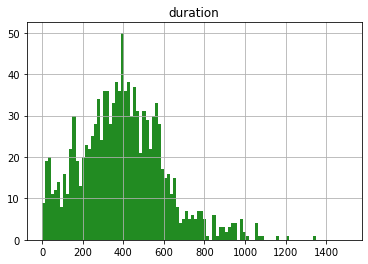

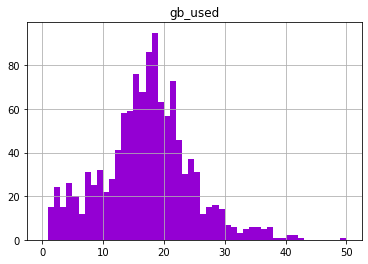

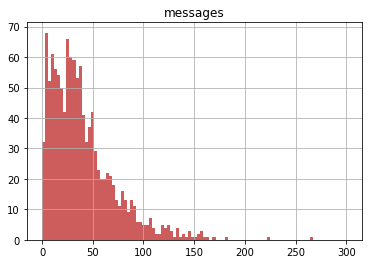

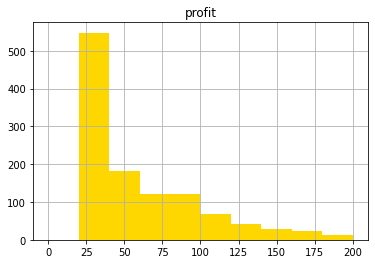

In [45]:
# surf plan stats
print('surf plan stats:')
display(df_surf.describe())
calculate_stat(df_surf)
plot_hist(df_surf)


In [46]:
exceed_calls_surf = len(df_surf[df_surf['duration'] > 500]) / len(df_surf)
exceed_gb_surf = len(df_surf[df_surf['gb_used'] > 15]) / len(df_surf)
exceed_messages_surf = len(df_surf[df_surf['messages'] > 50]) / len(df_surf)

display(exceed_calls_surf, exceed_gb_surf, exceed_messages_surf)

0.288135593220339

0.5898305084745763

0.26949152542372884

#### *Observations for surf plan*

##### Calls:
we see that calls duration stats are: average 387.9, std: 204.5, median: 382.0
The mean and the median have similar values, with less then 5% of 1 std difference, meaning that the data is not skewed. 
However, the std of 204.5 show there is a big dispersion in data values. 
The histogram plot also shows a normal distribution, as expected from the close values of mean and median.
##### Internet usage:
we see that calls duration stats are: average: average: 17.2, std: 7.9, median: 17.0
The mean and the median have similar values, with less then 5% of 1 std difference, meaning that the data is not skewed. 
However, the std of 7.9 show there is a big dispersion in data values. 
The histogram plot also shows a normal distribution, as expected from the close values of mean and median. 
##### Messages sent:
we see that calls duration stats are: average: 40.1, std: 33.0, median: 32.0
The mean and the median have relatvely similar values, with less then 30% of 1 std difference. 
However, the std of 33.0 show there is a big dispersion in data values. 
The histogram plot also shows a skewed to the right distribution pattern.
interpretaion: we cannot treat the messages data as normally distrubited when determine hypothesis test type for messages data. 

##### Profit:
we see that profit stats are: average: 60.0, std: 55.1, median: 40.0.
The std of 33.0 show there is a big dispersion in data values. 


#### Statistics summary: 
For hypothesis tests:
- Test calls as normally disturbted data.
- Test internet useage as normally disturbted data.
- Test messages and profit data are skewed

#### <font color='Purple'> Conclusions and costumer behaviour for surf users:</font> </div>

* We see that over 70% of the surf users exceed their package limit, with an averge of 60.0 dollars per month! 
* These numbers show a profit which is triple then the basic package price. It should alert us about the pricing of the package, as obviously, most users won't be thrilled with getting a bills much higher then their base price each month.

* We see that the category which users exceeds most is the internet package, where over 50% of the surf users exceed the basic 15gb limit, and this is probably the main reason for the big profit numbers we get.




<a class="anchor" id="3.9"></a>
### Ultimate plan analysis


ultimate plan stats:


,user_id,month,duration,mb_used,gb_used,messages,profit
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,1247.442142,9.241796,393.006908,17250.995838,17.343696,46.455959,72.248705
std,149.775881,2.492254,222.435528,7687.033067,7.494935,32.930135,11.034406
min,1000.000000,1.000000,0.000000,290.060000,1.000000,1.000000,70.000000
25%,1126.000000,8.000000,232.000000,12709.450000,13.000000,21.000000,70.000000
50%,1236.000000,10.000000,376.000000,16867.460000,17.000000,41.000000,70.000000
75%,1389.500000,11.000000,517.000000,20883.600000,21.000000,66.000000,70.000000
max,1497.000000,12.000000,1217.000000,46595.330000,46.000000,166.000000,182.000000


Calls duraion per month stats:
 average: 393.0, std: 222.2, median: 376.0
Internet per month stats:
 average: 17.3, std: 7.5, median: 17.0
Messages per month stats::
 average: 46.5, std: 32.9, median: 41.0
Profit per month stats::
 average: 72.2, std: 11.0, median: 70.0


array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'gb_used'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'messages'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'profit'}>]], dtype=object)

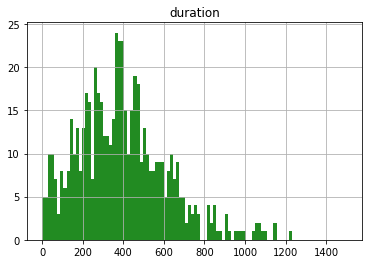

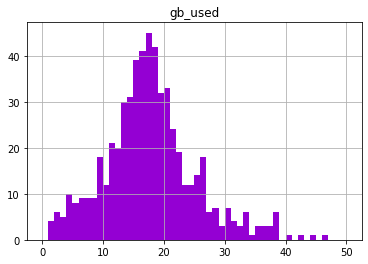

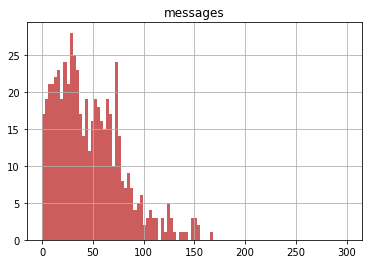

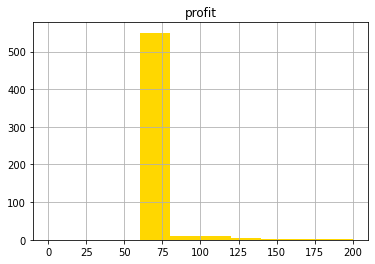

In [47]:
# ultimate plan stats
print('\nultimate plan stats:')
display(df_ultimate.describe())
calculate_stat(df_ultimate)
plot_hist(df_ultimate)


In [48]:
exceed_calls_ultimate = len(df_ultimate[df_ultimate['duration'] > 500]) / len(df_ultimate)
exceed_gb_ultimate = len(df_ultimate[df_ultimate['gb_used'] > 15]) / len(df_ultimate)
exceed_messages_ultimate = len(df_ultimate[df_ultimate['messages'] > 50]) / len(df_ultimate)

display(exceed_calls_ultimate , exceed_gb_ultimate , exceed_messages_ultimate )

0.2694300518134715

0.6010362694300518

0.4110535405872193

#### *Observations for surf plan*

##### Calls:
we see that calls duration stats are: average:  average: 386.0, std: 211.8, median: 376.0
The mean and the median have similar values, with less then 5% of 1 std difference, meaning that the data is not skewed. 
However, the std of 211.8 show there is a big dispersion in data values. 
The histogram plot also shows a normal distribution, as expected from the close values of mean and median.
##### Internet usage:
we see that calls duration stats are: average: average: average: 17.7, std: 7.8, median: 17.0
The mean and the median have similar values, with less then 5% of 1 std difference, meaning that the data is not skewed. 
However, the std of 7.8 show there is a big dispersion in data values. 
The histogram plot also shows a normal distribution, as expected from the close values of mean and median. 
##### Messages sent:
we see that calls duration stats are: average:  average: 46.3, std: 32.9, median: 41.0
The mean and the median have relatvely similar values, with less then 30% of 1 std difference. 
However, the std of 32.9 show there is a big dispersion in data values. 

The histogram plot also shows a skewed to the right distribution pattern.
interpretaion: we cannot treat the messages data as normally distrubited when determine hypothesis test type for messages data. 

##### Profit:
we see that profit stats are:  average: 72.3, std: 11.4, median: 70.0
Simialr values of mean and mediance, and much lower std value compare to the surf plan. 



#### Statistics summary: 

For all data categories: big spread, and most of the points are not centered around the mean.

For hypothesis tests we could assome by the histograms:
- Test calls as normally disturbted data.
- Test internet useage as normally disturbted data.
- Test messages data as skewed data.

#### <font color='Purple'> Conclusions and costumer behaviour for Ultimate users:</font> </div>

* Unlike the surf users, here we that only 5.7% of the sure users exceed their package limit. 

* These numbers, together with the mean profit of 72.3 dollars, indicate that this package is well priced. 

* We see that the category which users exceeds most is the internet package, where over 60% of the ultimate users exceed the 30gb limit. However, this is marginal over use, as the mean profit is very close to the package price.




### <font color='Purple'> Data Analysis - Surf vs Ultimate  Comparison </font> </div>

#### Reminder:
* Percentage of surf users who exceed the plan: 70.2%
* Percentage of ultimate users who exceed the plan: 5.7%


* The average monthly profit from surf plan is: 60.0 
* The average monthly profit from ultimate plan is: 72.3


* Surf - we see that profit stats are: average: 60.0, std: 55.1, median: 40.0
* Ultimate - we see that profit stats are:  average: 72.3, std: 11.4, median: 70.0


#### Conclusions:
we see that in both cases, users behaviour is almost identical in each cetegory. This means that the pricing of each package with it's limitations, does not influpeople consumption of the different



<a class="anchor" id="4"></a>
## Step 4:  Test the hypotheses


<a class="anchor" id="4.01"></a>
### The Shapiro-Wilk Test for Normality 

Although we can see that the data is normally distribued (except for profit columns), we will run as a test the Shapiro-Wilk test as an excercise to be sure our assumption is true.

In [49]:
# check for profit column
print (st.shapiro(df_surf.profit))
print (st.shapiro(df_ultimate.profit))

# double-check. run the shapiro on all columns
def shapiro(df):
    alpha = 0.05
    parameters = ['duration', 'gb_used', 'messages']
    for x in parameters:
        print('For {} parameter'.format(x))     
        result =  st.shapiro(df[x])
        if result[1] > alpha:
            print ('We accept the null, data is normally distributed')
        else:
            print ('We rejact the null, data is not normally distributed')

print('\n For Surf users:')
shapiro(df_surf)
print('\n For ultimate users:')
shapiro(df_ultimate)

(0.7450026273727417, 3.566737592932136e-39)
(0.21068042516708374, 8.96831017167883e-44)

 For Surf users:
For duration parameter
We rejact the null, data is not normally distributed
For gb_used parameter
We rejact the null, data is not normally distributed
For messages parameter
We rejact the null, data is not normally distributed

 For ultimate users:
For duration parameter
We rejact the null, data is not normally distributed
For gb_used parameter
We rejact the null, data is not normally distributed
For messages parameter
We rejact the null, data is not normally distributed


#### Conclusion: 
* After testing for Normality using the Shapiro-Wilk method, we see that the data is normally distrubuted. 
* This is good for our analysis, so we can use the t-test 

<a class="anchor" id="4.1"></a>
### Test 1: The average profit from users of Ultimate and Surf calling plans differs.

Reminder, according to the central limit theorem (CLT), the mean of the population can be estimated from the sample mean.

#H0 : The average profit from ultimate plan (m1) does not differs the profit from surf plan (m2); m1 = m2.
#H1 : m1 != m2

In [50]:


# set alpha value
alpha = .05

# After review - check for Equality of Variances using the Levane's Test
plan_var = st.levene(df_surf.profit, df_ultimate.profit, center='mean')
display(plan_var)


# run ttest

# using equal_var = True, as the levene result show p-value smaller then the alpha value.
# When define eual_var as True, the method in use is the Student's t-test.
results = st.ttest_ind(
        df_surf.profit, 
        df_ultimate.profit, equal_var = True)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 


LeveneResult(statistic=501.6108552885694, pvalue=6.13312600402989e-98)

p-value:  2.1144742905252396e-08
We reject the null hypothesis


<div class="alert alert-block alert-warning">
<b>Remarks and tips📌:</b> Nadav, I see that you have specified the `equal_var`,but why have you specified it in this way, equal to Fasle?  Before testing the hypotheses with the Students' t-test it is required to check the variance of the two samples for check variances for homogeneity (compare not the means, but variances).

This is necessary in order to understand with which parameter to use the test method (Student's t-test or Welch's t-test) and to specify the equal_var argument inside the st.ttest_ind method (you can read more in the scipy documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
<br/>

To check if the assumption of homogeneity of variances is met, you can use the Leuven test, which is implemented in scipy. The method allows you to estimate the equality of variances using the p-level of significance. You can read more about this method at the link: 
https://medium.com/@kyawsawhtoon/levenes-test-the-assessment-for-equality-of-variances-94503b695a57
    

</div>

#### *Conclusion: We rejact the null hypothesis, and can't exclude that the profit from each plan is different.*
#### *Interpretation: This means that the ultimate package deal is more profitable due to it's initial price, as we see before that the stats are similar for each plan.*

<a class="anchor" id="4.2"></a>
### Test 2: The average profit from users in NY-NJ area is different from that of the users from other regions.

#H0 : The average profit from NY-Nj (m1) does not differs the profit from other regions (m2); m1 = m2.
#H1 : m1 != m2


In [51]:
# set varaibles for each of the sampels
df_ny_nj = df_merged_NY_NJ[df_merged_NY_NJ['city'] == 'NY-NJ']
df_not_ny_nj = df_merged_NY_NJ[df_merged_NY_NJ['city'] == 'Other']

# set alpha value
alpha = .05

# After review - check for Equality of Variances using the Levane's Test
city_var = st.levene(df_ny_nj.profit, df_not_ny_nj.profit, center='mean')
display(city_var)
 

# run ttest

# using equal_var = False, as the levene result show p-value bigger then the alpha value.
# When  eual_var = False, the method in use is the Welch t-test.
results = st.ttest_ind(
        df_ny_nj.profit, 
        df_not_ny_nj.profit, equal_var = False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 
        


LeveneResult(statistic=7.49249499612885e-05, pvalue=0.9930946440324494)

p-value:  0.003694778603928449
We reject the null hypothesis


#### *Conclusion: We rejact the null hypothesis that the profit from NY-NJ users is similar to the profit of users from other locations.*

#### *Interpretation: Users in the NY-NJ are likely to be more profitable then users in othe locations, we should put more focus on this area then other locations.

In [52]:
display(df_ny_nj.describe())
display(df_not_ny_nj.describe())



,user_id,month,duration,mb_used,gb_used,messages,profit
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.00000
mean,1215.383513,9.200717,403.344086,16792.244373,16.867384,35.132616,57.39724
std,129.008169,2.454448,185.513995,7333.739809,7.181134,26.850244,38.81209
min,1014.000000,2.000000,0.000000,290.060000,1.000000,1.000000,20.00000
25%,1113.500000,8.000000,278.500000,12839.935000,13.000000,13.000000,20.52500
50%,1181.000000,10.000000,418.000000,16692.580000,17.000000,31.000000,50.15000
75%,1299.000000,11.000000,521.500000,20528.445000,21.000000,48.000000,70.00000
max,1494.000000,12.000000,1058.000000,38583.960000,38.000000,126.000000,228.18000


,user_id,month,duration,mb_used,gb_used,messages,profit
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000
mean,1250.543243,9.274324,393.587838,16841.575676,16.962162,43.036486,65.004304
std,140.489560,2.440173,219.018140,7779.698356,7.602528,33.518848,45.398552
min,1000.000000,1.000000,1.000000,92.310000,1.000000,1.000000,20.000000
25%,1132.000000,8.000000,241.750000,12484.227500,13.000000,18.000000,26.570000
50%,1252.000000,10.000000,378.000000,16931.895000,17.000000,35.000000,70.000000
75%,1366.000000,11.000000,521.000000,20968.340000,21.000000,61.000000,70.000000
max,1497.000000,12.000000,1344.000000,70931.590000,70.000000,266.000000,586.980000


<a class="anchor" id="5"></a>
## Step 5:  Overall Conclusion 

**Costumer behaviour:**
* We see that users behavior is not very different in any of the tested categories, with very similar statistical values in each one (calls, internet usage and messages). 
* surf plan users exceed the plan's limits a lot more compare to the ultimate plan users. This is observed both in statistical results (median, mean, std) and in the profit histogram. 

**From EDA:**
* The ultimate plan is more profitable with higher average profit. 
* Despite the fact that ultimate users stay within the package, the plan is still more profitable, due to it's initial higher price. 
* Calls and Internet usages are normally distrubued. 

**Hyphothesis tests:**
- Test 1: There is a difference in profits from surf and ultimate plans.
- Test 2: Profits from NY-NJ users are not different then the profits of ther places users. 

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion**

Nadav, thank you for submitting your project! Thank you for submitting your project! I can see that you've worked really hard on it! I'm really impressed this the amount of work you have done. But there are several things in your project which I suppose it is important to fix in order to make your project really ideal! My comments will navigate you!

<br/>

**Good things and practices in your project I want to highlight🙂**:
* I want to point out your code style and formatting: for me it was a pleasure to review your project!
* You use different methods for working with your data. It is really great that you can apply these methods on practice, keep it up!
* I am really impressed with the automation tools that you use for completing the tasks: you have created very effective functions!
* You worked eith the visualization a lot, and you can build the correct types of graphs. Nice!
* You have also demonstrated the knowledge of statistics, you correctly interpreted the basic statistics and histograms.

**What is worth working on👀**:
* Pay attention to the step of preprocessing data, especially the moment with the deleting of the dublicates.
* Pay more attention to checking the assumptions of the Student's t-test.
* Please, complement your conclusions adding more 'user-friendly' explanations not only in the language of ststistics but also in the language of the business, you client and simply the real world.

**Good luck! I will wait for your work for a second iteration of review!😉**

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion: second iteration of review**

Nadav, thank you for submitting your project with corrections! You have significantly improved your project, it is really amazing job! Thanks for your patience and desire to bring the project to completion! Now I congratulate you on the end of the project and I hasten to inform you that it has been accepted and you can move on to the next sprint!


**I wish you the same cool projects in the next sprints😉**
